## Import necessary libraries 1st 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
import tensorflow as tf 
import matplotlib.pyplot as plt 

2025-01-01 19:10:39.591125: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-01 19:10:42.020040: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735776642.908517     403 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1735776643.159921     403 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-01 19:10:45.533663: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Data set structure : 
1. test
2. train
3. labels.csv
* In labels.csv have unique id related to each breed's image as per train folder 
## Generate a list of filenames in train folder and and id list corresponding to the filenames. 

In [3]:
labels = pd .read_csv('Data/augmented_train.csv')
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [4]:
unique_breeds = labels.breed.unique()
len(unique_breeds)

120

<Axes: xlabel='breed'>

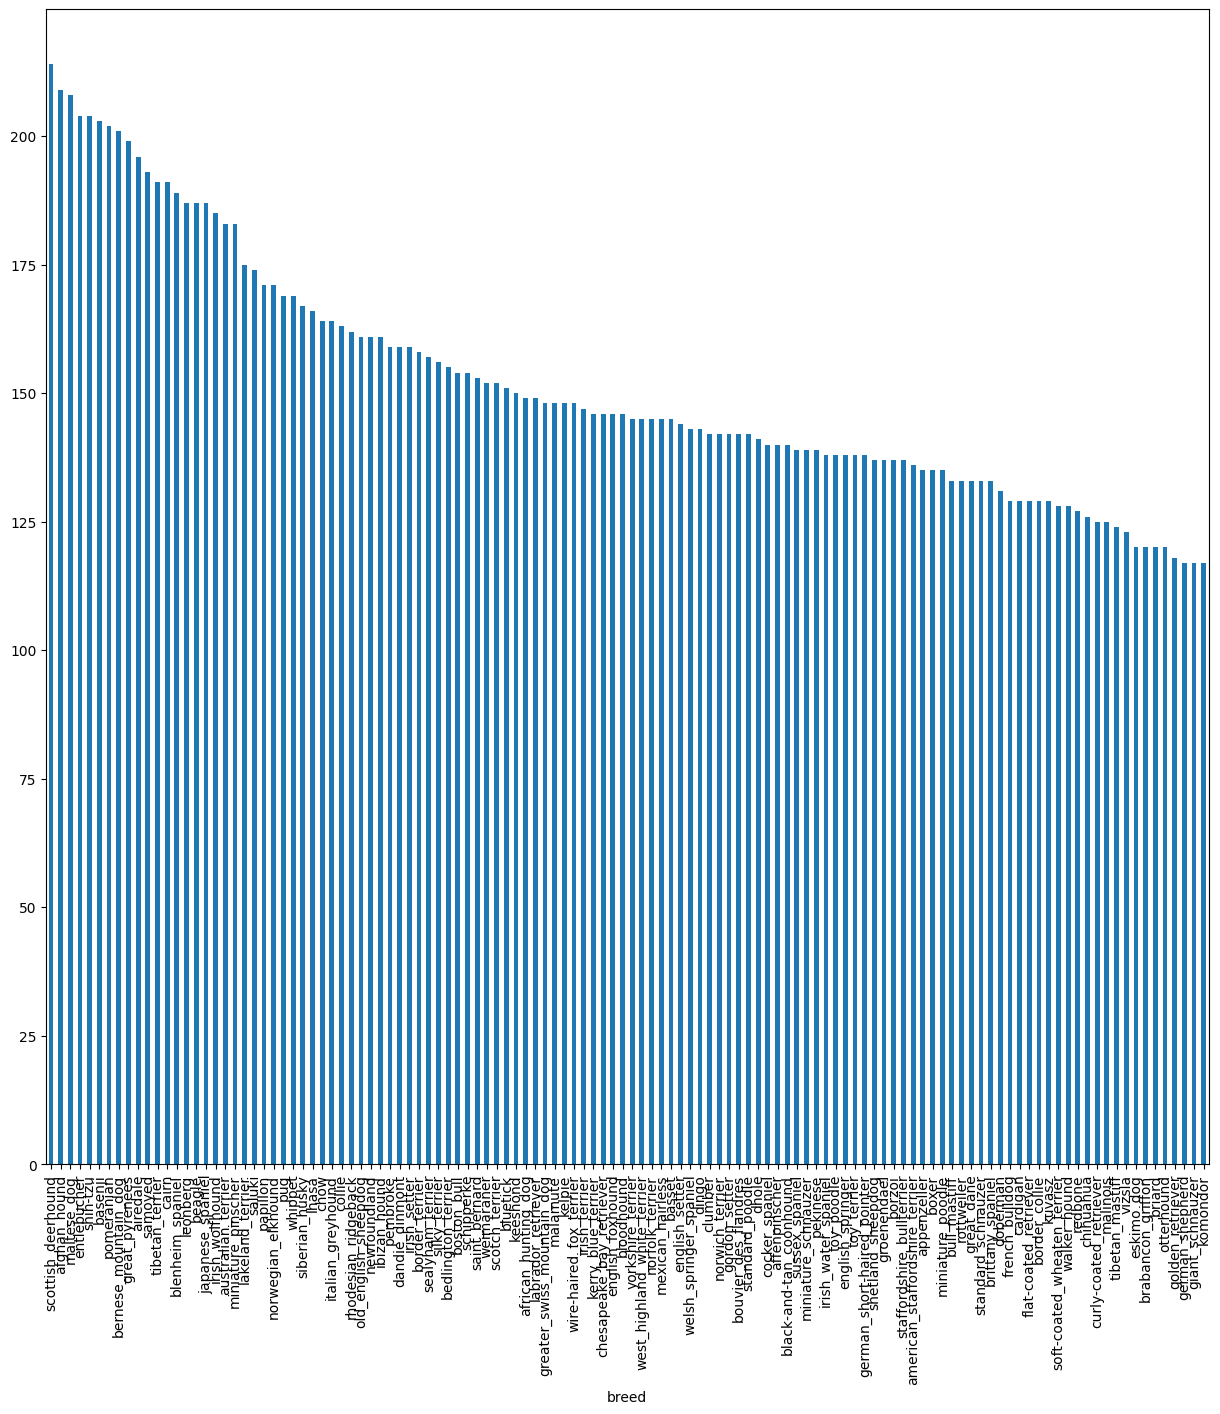

In [5]:
labels.breed.value_counts().plot.bar(figsize=(15,15))

In [6]:
labels.breed.value_counts().median()

np.float64(145.5)

## So there are on average 82 images per 120 breed 

In [7]:
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

## Train filenames (need to split this in 8:2 train val set)

In [8]:
filenames = ['Data/train/' + items + '.jpg' for items in labels['id'] ]
filenames[:10]

['Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'Data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'Data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'Data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'Data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'Data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'Data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'Data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'Data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'Data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

## Convert labels['breed'] to booleans for tensorflow 

In [9]:
boolean_labels = [ items == unique_breeds for items in labels['breed']  ]
len(boolean_labels),len(filenames)

(18222, 18222)

In [10]:
boolean_labels = np.array(boolean_labels)
boolean_labels.astype('int')[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Understand that tensorflow needs data in form of tuple (filename,label)

In [11]:
# Function for converting data into tuple form 
def get_image_labels(image_path,label):

    return image_path,label

## Create training and validation set 

In [12]:
X = filenames 
y = boolean_labels 

## For experimentation purpose will use only 10000 images first 

In [13]:
num_images = 10000 
X_train,X_val,y_train,y_val = train_test_split(X[:num_images],y[:num_images],test_size=0.2,random_state=42)

In [14]:
len(X_train),len(X_val),len(y_train),len(y_val)

(8000, 2000, 8000, 2000)

## Try to see our images and corrsponding label 

In [15]:
from matplotlib.pyplot import imread 
image = imread(X_train[0])
image.shape

(375, 500, 3)

In [16]:
%matplotlib inline 

In [17]:
image.max(),image.min()

(np.uint8(255), np.uint8(0))

In [18]:
tf.constant(image)

I0000 00:00:1735776690.333212     403 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5520 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[203, 191, 175],
        [184, 172, 156],
        [219, 207, 191],
        ...,
        [204, 195, 186],
        [203, 194, 185],
        [211, 202, 193]],

       [[218, 206, 190],
        [154, 142, 126],
        [174, 162, 146],
        ...,
        [207, 198, 189],
        [205, 196, 187],
        [208, 199, 190]],

       [[228, 216, 200],
        [174, 162, 146],
        [158, 146, 130],
        ...,
        [206, 196, 186],
        [209, 199, 189],
        [213, 203, 193]],

       ...,

       [[192, 173, 169],
        [183, 164, 160],
        [176, 157, 153],
        ...,
        [218, 199, 193],
        [213, 194, 188],
        [203, 184, 178]],

       [[174, 155, 151],
        [178, 159, 155],
        [179, 160, 156],
        ...,
        [220, 201, 195],
        [229, 210, 204],
        [231, 212, 206]],

       [[161, 142, 138],
        [174, 155, 151],
        [184, 165, 161],
        ...,
        [201, 182, 17

In [19]:
from tensorflow.keras import layers
## Now we have to process the image 
img_size = 224

def image_process(filepath,img_size=img_size):
    image = tf.io.read_file(filepath)

    image = tf.image.decode_jpeg(image,channels=3)

    image = tf.image.convert_image_dtype(image,tf.float32)

    image = tf.image.resize(image,size=[img_size,img_size])
    return image

In [20]:
## Now we will define a function which return images with labels in form of tuple 
def get_image_label(filepath,label):
    image = image_process(filepath)
    return image,label

## Need to turn our data into batches (ideal batch size is 32)

In [21]:
batch_size = 32 

def create_data_batch(X,y=None,test_data=False,val_data=False,batch_size=batch_size):
    if test_data :
        print('Creating test data batch!!')
        data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        data_batch = data.map(image_process).batch(batch_size)
        return data_batch
    elif val_data : 
        print('Creating validation data batch!!')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        data_batch = data.map(get_image_label).batch(batch_size)
        return data_batch
    else:
        print('Creating training data batch!!')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))
        data_batch = data.shuffle(buffer_size=len(X))
        data_batch = data.map(get_image_label).batch(batch_size)
        return data_batch

## Try to Augment the data 

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
# # Now we will try keras preprocessing layers for data augmentation as well 
# import cv2
# import uuid

# def data_augment_adder(train_data):

   
#     data_augmentation = tf.keras.Sequential([
#         layers.RandomFlip('horizontal_and_vertical'),
#         layers.RandomRotation(0.2),
#         layers.RandomContrast(factor=0.2),
#         layers.RandomZoom(0.2),
#     ])
    
#     for  image,label in train_data.unbatch().as_numpy_iterator():
#         unique_id = uuid.uuid4()
#         breed_name = unique_breeds[np.argmax(label)]
#         labels.loc[len(labels)] = [str(unique_id),breed_name]
#         augmented_image = data_augmentation(image)
#         augmented_image =  augmented_image.numpy()
#         augmented_image = augmented_image - augmented_image.min()
#         augmented_image = augmented_image / augmented_image.max() * 255
#         augmented_image = augmented_image.astype(np.uint8)
#         cv2.imwrite('Data/train/'+str(unique_id)+'.jpg',augmented_image)
        
# labels_1 = data_augment_adder(train_data)
# labels.to_csv('Data/augmented_train.csv', index=False) 

## Create train and validation data 

In [24]:
train_data = create_data_batch(X_train,y_train)
val_data = create_data_batch(X_val,y_val,val_data=True)

Creating training data batch!!
Creating validation data batch!!


In [25]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualize batches 

In [26]:
def show_25_images(images,labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis('off')

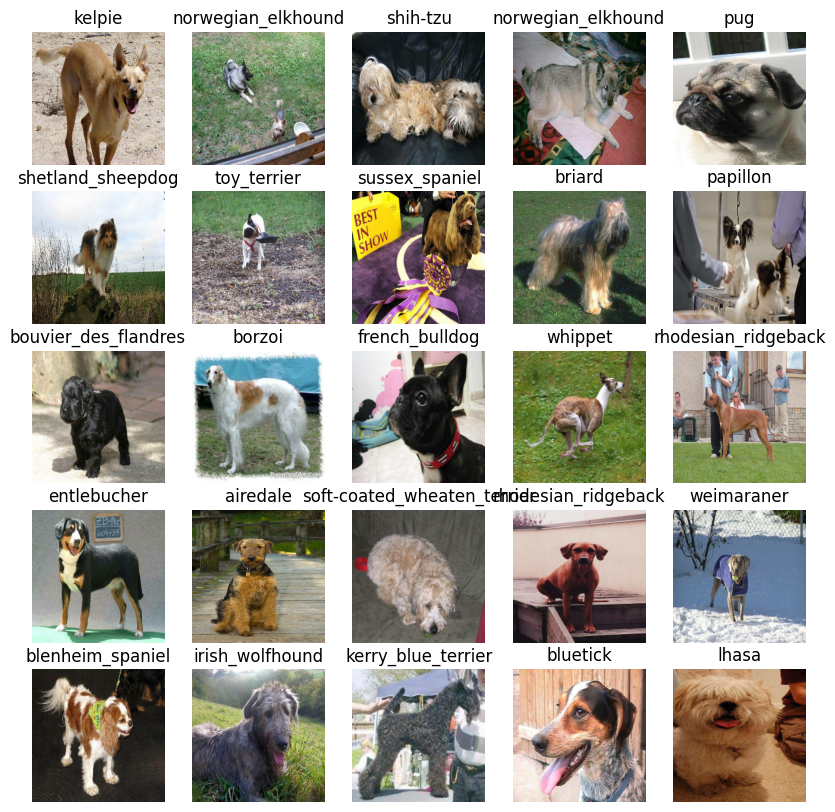

In [27]:
train_images,train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

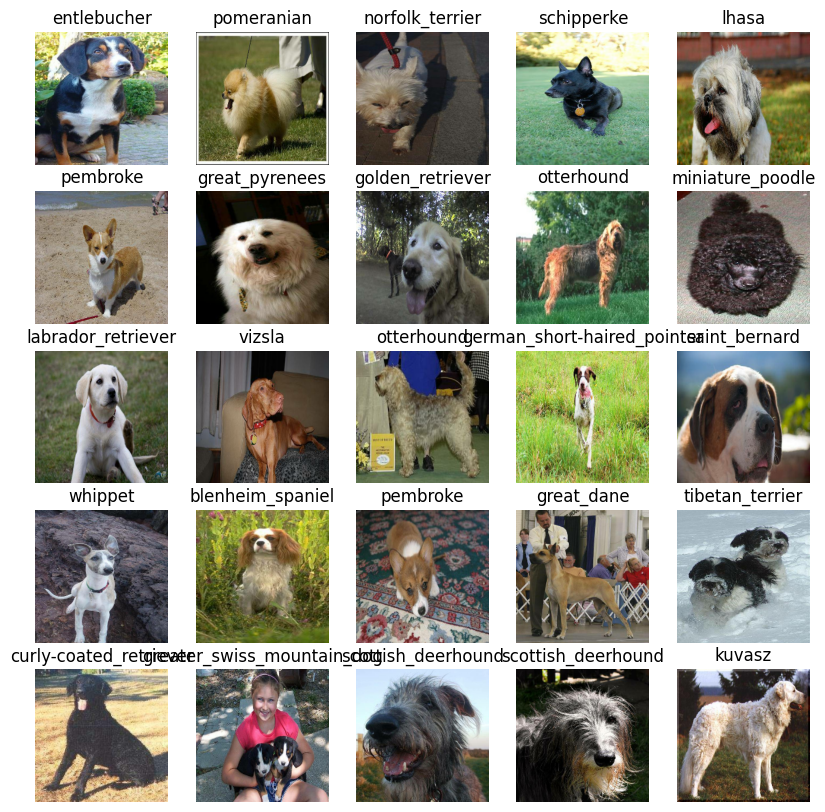

In [28]:
val_images,val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## Building Model 

In [29]:
img_size = 224 

input_shape = [None,img_size,img_size,3]

output_shape = len(unique_breeds)

url = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4'

In [30]:
import tf_keras 
import tensorflow_hub as hub

In [31]:
def create_model(input_shape=input_shape,output_shape=output_shape,url=url):
    print(f'Building the model {url}')

    # Setup the model layer 
    model = tf_keras.Sequential([
        hub.KerasLayer(url),
        tf_keras.layers.Dense(units=output_shape,activation='softmax')## Layer1 (input layer)
    ])

    # Compile the model 
    model.compile(
        loss = tf_keras.losses.CategoricalCrossentropy(),
        optimizer = tf_keras.optimizers.Adam(),
        metrics = ['accuracy']
    )

    # Build the model 
    model.build(input_shape)

    return model

In [32]:
model = create_model()
model.summary()

Building the model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Create Tensorboard Callbacks 

In [33]:
import datetime 
import os 
def create_tensorboard_callback():
    logdir = os.path.join('logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

    return tf_keras.callbacks.TensorBoard(logdir)

## Define earlystopping 

In [34]:
early_stopping = tf_keras.callbacks.EarlyStopping(monitor='val_accuracy',patience = 3)

## Training the model 

In [35]:
num_epochs = 100 
print('gpu avalilable!!' if tf.config.list_physical_devices('GPU') else 'gpu not available!!')

gpu avalilable!!


In [36]:
def train_model():
    model = create_model()

    tensorboard = create_tensorboard_callback()

    model.fit(
        x = train_data,
        epochs = num_epochs,
        validation_data = val_data,
        validation_freq = 1,
        callbacks = [tensorboard,early_stopping]
    )

    return model 

In [51]:
model = train_model()

Building the model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100


I0000 00:00:1735451424.048209    1249 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1735451427.143215    1246 service.cc:148] XLA service 0x7fa89143f7f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735451427.145582    1246 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-12-29 00:50:27.256053: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735451427.577552    1246 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


250/250 [==============================] - 16s 39ms/step - loss: 1.5581 - accuracy: 0.6270 - val_loss: 0.7148 - val_accuracy: 0.7890
Epoch 2/100
250/250 [==============================] - 11s 43ms/step - loss: 0.4175 - accuracy: 0.8805 - val_loss: 0.6642 - val_accuracy: 0.7970
Epoch 3/100
250/250 [==============================] - 10s 42ms/step - loss: 0.2303 - accuracy: 0.9482 - val_loss: 0.6640 - val_accuracy: 0.7975
Epoch 4/100
250/250 [==============================] - 9s 37ms/step - loss: 0.1438 - accuracy: 0.9755 - val_loss: 0.6691 - val_accuracy: 0.8000
Epoch 5/100
250/250 [==============================] - 11s 42ms/step - loss: 0.0978 - accuracy: 0.9875 - val_loss: 0.6755 - val_accuracy: 0.8030
Epoch 6/100
250/250 [==============================] - 11s 43ms/step - loss: 0.0705 - accuracy: 0.9930 - val_loss: 0.6842 - val_accuracy: 0.8030
Epoch 7/100
250/250 [==============================] - 9s 37ms/step - loss: 0.0536 - accuracy: 0.9954 - val_loss: 0.6924 - val_accuracy: 0.8025

In [52]:
import tensorflow as tf
print("CUDA version:", tf.sysconfig.get_build_info()["cuda_version"])
print("cuDNN version:", tf.sysconfig.get_build_info()["cudnn_version"])

CUDA version: 12.5.1
cuDNN version: 9


In [53]:
import tensorflow as tf
print(tf.__version__)

2.18.0


## Make some predictions on validation data 

In [54]:
predictions = model.predict(val_data,verbose=1)
predictions 

63/63 [==============================] - 3s 38ms/step


array([[1.0958875e-09, 6.9621184e-12, 5.8704604e-11, ..., 1.2678500e-12,
        4.9452213e-12, 1.0679805e-09],
       [4.8590337e-10, 1.4117935e-09, 6.0210601e-05, ..., 2.3147262e-09,
        2.2662296e-10, 4.1394448e-09],
       [4.9307350e-06, 9.6317117e-06, 5.9287529e-05, ..., 1.5742926e-05,
        1.8696721e-05, 3.3512199e-06],
       ...,
       [2.9450403e-06, 3.0266506e-08, 1.3687584e-01, ..., 8.4374966e-07,
        9.9984475e-04, 1.8431797e-07],
       [6.9737587e-07, 4.1443999e-09, 7.1979328e-10, ..., 1.2475294e-07,
        6.9099620e-08, 1.1108388e-09],
       [1.9613178e-09, 6.1671273e-09, 1.7514528e-04, ..., 2.2444403e-06,
        6.2266649e-06, 3.1744742e-09]], dtype=float32)

In [55]:
np.max(predictions[3]), np.sum(predictions[3]), unique_breeds[np.argmax(predictions[3])],np.argmax(predictions[3])

(np.float32(0.96295893), np.float32(1.0), 'schipperke', np.int64(43))

## Visualize the predictions in image format

In [56]:
def get_pred_labels (prediction_probabilities):
    return unique_breeds[np.argmax(prediction_probabilities)]

## Now since validation data is in batch form , need to unbatch it and comare the predicted labels with ground truths.

In [57]:
val_images = [] 
val_labels = [] 

for images,labels in val_data.unbatch().as_numpy_iterator():
    val_images.append(images)
    val_labels.append(labels)
val_images[0],val_labels[0]

2024-12-29 00:53:59.265770: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(array([[[0.96884924, 0.9701885 , 0.6773138 ],
         [0.9649684 , 0.9649684 , 0.6752449 ],
         [0.97255224, 0.97255224, 0.6897149 ],
         ...,
         [0.94544876, 0.93533266, 0.63851905],
         [0.9122807 , 0.90027964, 0.59165734],
         [0.6266023 , 0.6167168 , 0.30141547]],
 
        [[0.9636907 , 0.9677085 , 0.69290984],
         [0.97148985, 0.97514886, 0.7090773 ],
         [0.9998248 , 0.99992114, 0.74782914],
         ...,
         [0.97280353, 0.9686894 , 0.715118  ],
         [0.9849285 , 0.99132735, 0.7000457 ],
         [0.8505023 , 0.8618907 , 0.55982476]],
 
        [[0.94763345, 0.9589167 , 0.70516145],
         [0.96966976, 0.9795524 , 0.73575866],
         [0.9953722 , 0.99858195, 0.7804973 ],
         ...,
         [0.8728771 , 0.8872267 , 0.69398195],
         [0.8451019 , 0.8824005 , 0.6274633 ],
         [0.7930096 , 0.83910555, 0.5551244 ]],
 
        ...,
 
        [[0.47171637, 0.37899917, 0.3959688 ],
         [0.23060554, 0.1464493 , 0.15993

In [58]:
get_pred_labels(val_labels[1]),get_pred_labels(predictions[1])

('pomeranian', 'pomeranian')

In [59]:
# Create a function  to unbatch dataset

def unbatch_batched_data(data):

    images=[]
    labels=[]
    for images1,labels1 in data.unbatch().as_numpy_iterator():
        images.append(images1)
        labels.append(labels1)
    return images,labels

In [60]:
val_images,val_labels = unbatch_batched_data(val_data)

2024-12-29 00:54:02.767262: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [61]:
val_images[0],val_labels[0]

(array([[[0.96884924, 0.9701885 , 0.6773138 ],
         [0.9649684 , 0.9649684 , 0.6752449 ],
         [0.97255224, 0.97255224, 0.6897149 ],
         ...,
         [0.94544876, 0.93533266, 0.63851905],
         [0.9122807 , 0.90027964, 0.59165734],
         [0.6266023 , 0.6167168 , 0.30141547]],
 
        [[0.9636907 , 0.9677085 , 0.69290984],
         [0.97148985, 0.97514886, 0.7090773 ],
         [0.9998248 , 0.99992114, 0.74782914],
         ...,
         [0.97280353, 0.9686894 , 0.715118  ],
         [0.9849285 , 0.99132735, 0.7000457 ],
         [0.8505023 , 0.8618907 , 0.55982476]],
 
        [[0.94763345, 0.9589167 , 0.70516145],
         [0.96966976, 0.9795524 , 0.73575866],
         [0.9953722 , 0.99858195, 0.7804973 ],
         ...,
         [0.8728771 , 0.8872267 , 0.69398195],
         [0.8451019 , 0.8824005 , 0.6274633 ],
         [0.7930096 , 0.83910555, 0.5551244 ]],
 
        ...,
 
        [[0.47171637, 0.37899917, 0.3959688 ],
         [0.23060554, 0.1464493 , 0.15993

In [62]:
def plot_pred (predictions,labels,images,n=0):

    pred_prob, truth_label , image = predictions[n] , labels[n] , images[n]

    pred_label = get_pred_labels(pred_prob)
    truth_label = get_pred_labels(truth_label)

    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    if pred_label == truth_label:
        color = 'green'
    else :
        color = 'red'

    plt.title(f'{pred_label}  {np.max(pred_prob)*100:.2f}% {truth_label}',color=color)

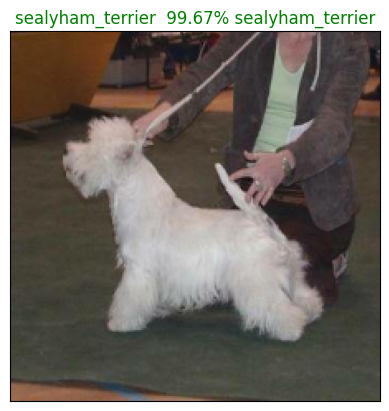

In [63]:
plot_pred(predictions=predictions,labels=val_labels,images=val_images,n=199)

In [64]:
np.max(predictions[199]),np.min(predictions[199])

(np.float32(0.99667895), np.float32(1.7282414e-10))

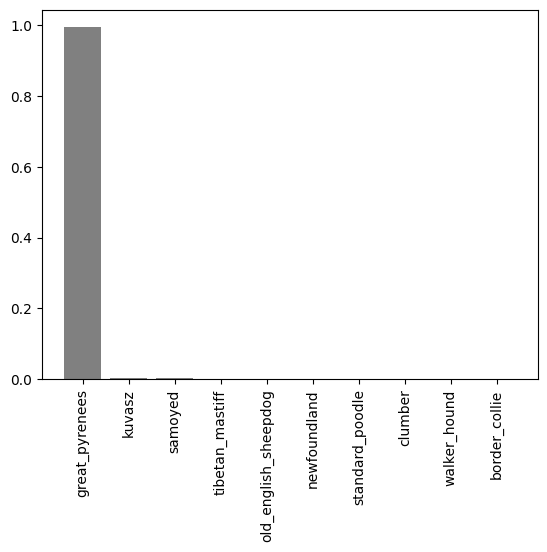

In [67]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
  '''
  plus the top 10 highest prediction confidences along with the truth label for sample n.
  '''

  pred_prob, true_label = prediction_probabilities[n],labels[n]

  # Get the predicted label
  pred_label = get_pred_labels(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find top 10 prediction confidence labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),labels=top_10_pred_labels,rotation='vertical')

  # Change color of tru labels
  # if np.isin(true_label,top_10_pred_labels):
  #   top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  # else:
  #   pass
plot_pred_conf(prediction_probabilities=predictions,labels=val_labels,n=6)

## Saving and realoding model 

In [54]:
def save_model(model,suffix=None):
    modeldir = os.path.join('models',datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
    model_path = modeldir+'-'+suffix+'.h5'
    print(f'Saving model to :{model_path}...')
    model.save(model_path)
    return model_path



In [55]:
def load_model(model_path):
    print(f'Loading the model from path:{model_path}')
    model = tf_keras.models.load_model(model_path,custom_objects={'KerasLayer':hub.KerasLayer})
    return model

In [70]:
save_model(model,'100-images-mobilenetV2-Adam')

Saving model to :models/20241229-00541735451672-100-images-mobilenetV2-Adam.h5...


'models/20241229-00541735451672-100-images-mobilenetV2-Adam.h5'

In [71]:
loaded_model = load_model('models/20241223-17311734993077-100-images-mobilenetV2-Adam.h5')

Loading the model from path:models/20241223-17311734993077-100-images-mobilenetV2-Adam.h5


In [72]:
loaded_model.evaluate(val_data)

63/63 [==============================] - 3s 33ms/step - loss: 1.2449 - accuracy: 0.6765


[1.2448638677597046, 0.6765000224113464]

In [73]:
len(X),len(y)

(18222, 18222)

In [74]:
len(X),len(X_train)

(18222, 8000)

## Train model on full data

In [75]:
full_data = create_data_batch(X,y)

Creating training data batch!!


In [76]:
# full model tensorboard 
full_data_tensorboard = create_tensorboard_callback()
# full model early_stopping 
full_data_early_stopping = tf_keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)

In [77]:
full_model = create_model()

Building the model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [78]:
full_model.fit(
    x = full_data,
    epochs = num_epochs,
    callbacks = [full_data_tensorboard,full_data_early_stopping]
)

Epoch 1/100
570/570 [==============================] - 21s 34ms/step - loss: 2.1560 - accuracy: 0.5062 
Epoch 2/100
570/570 [==============================] - 18s 31ms/step - loss: 1.1328 - accuracy: 0.7009
Epoch 3/100
570/570 [==============================] - 18s 31ms/step - loss: 0.8748 - accuracy: 0.7673
Epoch 4/100
570/570 [==============================] - 19s 33ms/step - loss: 0.7076 - accuracy: 0.8126
Epoch 5/100
570/570 [==============================] - 18s 32ms/step - loss: 0.5836 - accuracy: 0.8508
Epoch 6/100
570/570 [==============================] - 19s 33ms/step - loss: 0.4858 - accuracy: 0.8810
Epoch 7/100
570/570 [==============================] - 18s 31ms/step - loss: 0.4057 - accuracy: 0.9094
Epoch 8/100
570/570 [==============================] - 19s 33ms/step - loss: 0.3393 - accuracy: 0.9327
Epoch 9/100
570/570 [==============================] - 18s 32ms/step - loss: 0.2834 - accuracy: 0.9499
Epoch 10/100
570/570 [==============================] - 18s 32ms/step - 

In [79]:
save_model(full_model,suffix='full_model_augmented__mobilenetV2-Adam')

Saving model to :models/20241229-01021735452149-full_model_augmented__mobilenetV2-Adam.h5...


'models/20241229-01021735452149-full_model_augmented__mobilenetV2-Adam.h5'

In [81]:
load_full_model  = load_model('models/20241229-01021735452149-full_model_augmented__mobilenetV2-Adam.h5')

Loading the model from path:models/20241229-01021735452149-full_model_augmented__mobilenetV2-Adam.h5


## Making Predictions On Test DataSet 
1st we need to convert test data into the required form

In [61]:
test_path = 'Data/test/'
test_filepaths  = [test_path + fnames  for fnames in os.listdir(test_path)]
len(test_filepaths)

10357

In [62]:
# Create test data batches 
test_data = create_data_batch(test_filepaths,test_data=True)

Creating test data batch!!


In [63]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 331, 331, 3), dtype=tf.float32, name=None)>

In [85]:
test_predictions = load_full_model.predict(test_data,verbose=1)

324/324 [==============================] - 10s 29ms/step


In [86]:
# Saving predictions to csv file 
np.savetxt('preds_array_augmented.csv' , test_predictions , delimiter = ',')

In [87]:
test_predictions.shape

(10357, 120)

## Preparing test dataset for kaggle 

In [45]:
preds_df = pd.DataFrame(columns=['ID'] + list(unique_breeds) )
preds_df.head()

Empty DataFrame
Columns: [ID, boston_bull, dingo, pekinese, bluetick, golden_retriever, bedlington_terrier, borzoi, basenji, scottish_deerhound, shetland_sheepdog, walker_hound, maltese_dog, norfolk_terrier, african_hunting_dog, wire-haired_fox_terrier, redbone, lakeland_terrier, boxer, doberman, otterhound, standard_schnauzer, irish_water_spaniel, black-and-tan_coonhound, cairn, affenpinscher, labrador_retriever, ibizan_hound, english_setter, weimaraner, giant_schnauzer, groenendael, dhole, toy_poodle, border_terrier, tibetan_terrier, norwegian_elkhound, shih-tzu, irish_terrier, kuvasz, german_shepherd, greater_swiss_mountain_dog, basset, australian_terrier, schipperke, rhodesian_ridgeback, irish_setter, appenzeller, bloodhound, samoyed, miniature_schnauzer, brittany_spaniel, kelpie, papillon, border_collie, entlebucher, collie, malamute, welsh_springer_spaniel, chihuahua, saluki, pug, malinois, komondor, airedale, leonberg, mexican_hairless, bull_mastiff, bernese_mountain_dog, american_staffordshire_terrier, lhasa, cardigan, italian_greyhound, clumber, scotch_terrier, afghan_hound, old_english_sheepdog, saint_bernard, miniature_pinscher, eskimo_dog, irish_wolfhound, brabancon_griffon, toy_terrier, chow, flat-coated_retriever, norwich_terrier, soft-coated_wheaten_terrier, staffordshire_bullterrier, english_foxhound, gordon_setter, siberian_husky, newfoundland, briard, chesapeake_bay_retriever, dandie_dinmont, great_pyrenees, beagle, vizsla, west_highland_white_terrier, kerry_blue_terrier, ...]
Index: []

[0 rows x 121 columns]

In [89]:
# Append test_files ID to the dataframe's ID column
test_id = [os.path.splitext(paths)[0] for paths in os.listdir(test_path)]
preds_df['ID'] = test_id

In [90]:
preds_df.head(-1)

ID boston_bull dingo pekinese bluetick  \
0      000621fb3cbb32d8935728e48679680e         NaN   NaN      NaN      NaN   
1      00102ee9d8eb90812350685311fe5890         NaN   NaN      NaN      NaN   
2      0012a730dfa437f5f3613fb75efcd4ce         NaN   NaN      NaN      NaN   
3      001510bc8570bbeee98c8d80c8a95ec1         NaN   NaN      NaN      NaN   
4      001a5f3114548acdefa3d4da05474c2e         NaN   NaN      NaN      NaN   
...                                 ...         ...   ...      ...      ...   
10351  ffe9717b7937c262f849416976f7620a         NaN   NaN      NaN      NaN   
10352  ffeda8623d4eee33c6d1156a2ecbfcf8         NaN   NaN      NaN      NaN   
10353  fff1ec9e6e413275984966f745a313b0         NaN   NaN      NaN      NaN   
10354  fff74b59b758bbbf13a5793182a9bbe4         NaN   NaN      NaN      NaN   
10355  fff7d50d848e8014ac1e9172dc6762a3         NaN   NaN      NaN      NaN   

      golden_retriever bedlington_terrier borzoi basenji scottish_deerhound  \
0                  NaN                NaN    NaN     NaN                NaN   
1                  NaN                NaN    NaN     NaN                NaN   
2                  NaN                NaN    NaN     NaN                NaN   
3                  NaN                NaN    NaN     NaN                NaN   
4                  NaN                NaN    NaN     NaN                NaN   
...                ...                ...    ...     ...                ...   
10351              NaN                NaN    NaN     NaN                NaN   
10352              NaN                NaN    NaN     NaN                NaN   
10353              NaN                NaN    NaN     NaN                NaN   
10354              NaN                NaN    NaN     NaN                NaN   
10355              NaN                NaN    NaN     NaN                NaN   

       ... blenheim_spaniel silky_terrier sussex_spaniel  \
0      ...              NaN           NaN            NaN   
1      ...              NaN           NaN            NaN   
2      ...              NaN           NaN            NaN   
3      ...              NaN           NaN            NaN   
4      ...              NaN           NaN            NaN   
...    ...              ...           ...            ...   
10351  ...              NaN           NaN            NaN   
10352  ...              NaN           NaN            NaN   
10353  ...              NaN           NaN            NaN   
10354  ...              NaN           NaN            NaN   
10355  ...              NaN           NaN            NaN   

      german_short-haired_pointer french_bulldog bouvier_des_flandres  \
0                             NaN            NaN                  NaN   
1                             NaN            NaN                  NaN   
2                             NaN            NaN                  NaN   
3                             NaN            NaN                  NaN   
4                             NaN            NaN                  NaN   
...                           ...            ...                  ...   
10351                         NaN            NaN                  NaN   
10352                         NaN            NaN                  NaN   
10353                         NaN            NaN                  NaN   
10354                         NaN            NaN                  NaN   
10355                         NaN            NaN                  NaN   

      tibetan_mastiff english_springer cocker_spaniel rottweiler  
0                 NaN              NaN            NaN        NaN  
1                 NaN              NaN            NaN        NaN  
2                 NaN              NaN            NaN        NaN  
3                 NaN              NaN            NaN        NaN  
4                 NaN              NaN            NaN        NaN  
...               ...              ...            ...        ...  
10351             NaN              NaN            NaN        NaN  
10352

In [91]:
# Add predictions probabilities to each dog breed column 
preds_df[list(unique_breeds)] = test_predictions 
preds_df.head()

ID   boston_bull         dingo      pekinese  \
0  000621fb3cbb32d8935728e48679680e  3.737439e-14  7.312408e-16  1.279883e-06   
1  00102ee9d8eb90812350685311fe5890  7.300467e-10  8.493202e-09  1.081527e-09   
2  0012a730dfa437f5f3613fb75efcd4ce  2.783441e-14  3.701648e-12  9.439807e-12   
3  001510bc8570bbeee98c8d80c8a95ec1  7.527498e-10  3.691653e-10  4.341159e-11   
4  001a5f3114548acdefa3d4da05474c2e  1.209710e-18  2.247957e-13  4.881962e-07   

       bluetick  golden_retriever  bedlington_terrier        borzoi  \
0  4.742638e-15      2.613207e-14        7.197162e-19  8.130507e-12   
1  1.576957e-08      3.201220e-08        1.175160e-10  2.897795e-10   
2  5.478320e-10      3.670085e-07        3.046216e-13  2.128830e-05   
3  2.071370e-07      1.041988e-17        5.886975e-20  1.683872e-13   
4  8.671124e-11      8.306784e-13        6.299911e-13  5.752345e-11   

        basenji  scottish_deerhound  ...  blenheim_spaniel  silky_terrier  \
0  7.991498e-17        1.722937e-14  ...      2.436658e-08   1.129007e-12   
1  1.181857e-08        8.416487e-13  ...      9.791909e-12   1.096120e-12   
2  8.123444e-13        5.563210e-07  ...      1.625105e-08   1.419825e-09   
3  3.267508e-13        1.075895e-07  ...      1.290003e-07   1.138373e-12   
4  1.003489e-11        1.386436e-12  ...      5.382796e-13   2.159406e-05   

   sussex_spaniel  german_short-haired_pointer  french_bulldog  \
0    3.525100e-16                 1.446457e-14    5.640205e-14   
1    2.249491e-09                 4.573053e-12    2.002133e-05   
2    6.738366e-08                 2.306694e-04    2.176690e-11   
3    6.802414e-08                 1.261326e-05    3.897487e-08   
4    6.290129e-12                 3.919503e-12    9.766273e-07   

   bouvier_des_flandres  tibetan_mastiff  english_springer  cocker_spaniel  \
0          5.389448e-15     8.913245e-12      6.948387e-15    2.685586e-14   
1          3.952691e-12     5.741663e-06      4.928140e-10    6.013271e-13   
2          2.470578e-13     3.188863e-14      8.824399e-06    9.065402e-05   
3          6.749511e-06     3.858492e-06      3.727302e-08    2.748287e-05   
4          1.619983e-04     7.184047e-08      3.650427e-15    1.263031e-04   

     rottweiler  
0  1.645795e-17  
1  6.187287e-10  
2  8.745218e-14  
3  2.755622e-07  
4  1.436952e-08  

[5 rows x 121 columns]

In [92]:
# Save predictions dataframe to csv for submission to kaggle 
preds_df.to_csv('full_model_augmented_predictions_submission_1_mobilenetV2.csv',index=False)

## Now we will make predictions on custom images 

In [93]:
custom_image_path = 'custom_images/'
custom_image_filenames = [custom_image_path+fname for fname in os.listdir(custom_image_path)]
custom_image_filenames

['custom_images/cairn.jpg',
 'custom_images/kerry.jpg',
 'custom_images/otterhound.jpg']

In [94]:
custom_data = create_data_batch(custom_image_filenames,test_data=True)
custom_data

Creating test data batch!!


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [95]:
custom_preds = load_full_model.predict(custom_data,verbose=1)

1/1 [==============================] - 0s 274ms/step


In [96]:
custom_preds.shape

(3, 120)

In [97]:
custom_preds_labels = [get_pred_labels(custom_preds[i])  for i in range(len(custom_preds)) ]
custom_preds_labels

['cairn', 'kerry_blue_terrier', 'otterhound']

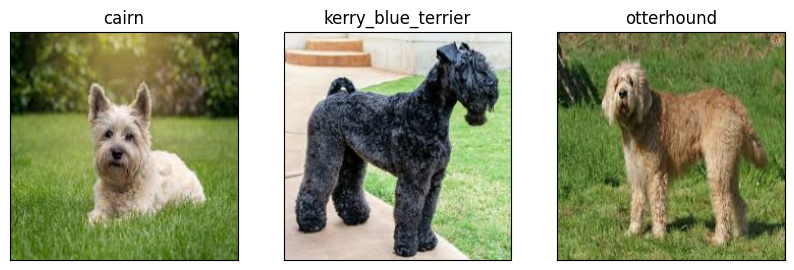

In [98]:
custom_images = [] 

for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)
plt.figure(figsize=(10,10))
for i,image in enumerate(custom_images):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_preds_labels[i])
    plt.imshow(image)


## Trying to use NasNetLarge model to get better accuracy 

In [38]:
img_size = 331

input_shape = [None,img_size,img_size,3]

output_shape = len(unique_breeds)

url = "https://www.kaggle.com/models/google/nasnet/TensorFlow2/large-classification/2"

In [39]:
def create_model(input_shape=input_shape,output_shape=output_shape,url=url):
    print(f'Building the model {url}')

    # Setup the model layer 
    model = tf_keras.Sequential([
        hub.KerasLayer(url),
        tf_keras.layers.Dense(units=output_shape,activation='softmax')## Layer1 (input layer)
    ])

    # Compile the model 
    model.compile(
        loss = tf_keras.losses.CategoricalCrossentropy(),
        optimizer = tf_keras.optimizers.Adam(),
        metrics = ['accuracy']
    )

    # Build the model 
    model.build(input_shape)

    return model

In [41]:
model = create_model()
model.summary()

Building the model https://www.kaggle.com/models/google/nasnet/TensorFlow2/large-classification/2
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              88953851  
                                                                 
 dense_3 (Dense)             (None, 120)               120240    
                                                                 
Total params: 89074091 (339.79 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 88953851 (339.33 MB)
_________________________________________________________________


## Prepocess training data as per NasNetLarge model

In [36]:
img_size = 331

def image_process(filepath,img_size=img_size):
    image = tf.io.read_file(filepath)

    image = tf.image.decode_jpeg(image,channels=3)

    image = tf.image.convert_image_dtype(image,tf.float32)

    image = tf.image.resize(image,size=[img_size,img_size])
    return image

In [52]:
num_images = 10000 
X_train,X_val,y_train,y_val = train_test_split(X[:num_images],y[:num_images],test_size=0.2,random_state=42)
train_data = create_data_batch(X_train,y_train)
val_data = create_data_batch(X_val,y_val,val_data=True)

Creating training data batch!!
Creating validation data batch!!


In [53]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 331, 331, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 331, 331, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Now we will train model

In [54]:
def train_model():
    model = create_model()

    tensorboard = create_tensorboard_callback()

    model.fit(
        x = train_data,
        epochs = num_epochs,
        validation_data = val_data,
        validation_freq = 1,
        callbacks = [tensorboard,early_stopping]
    )

    return model 

## training done on 8000 training and 2000 validation image dataset 

In [55]:
model_partially_trained = train_model()

Building the model https://www.kaggle.com/models/google/nasnet/TensorFlow2/large-classification/2
Epoch 1/100
250/250 [==============================] - 126s 464ms/step - loss: 0.7946 - accuracy: 0.8611 - val_loss: 0.2230 - val_accuracy: 0.9390
Epoch 2/100
250/250 [==============================] - 115s 459ms/step - loss: 0.1670 - accuracy: 0.9511 - val_loss: 0.2142 - val_accuracy: 0.9405
Epoch 3/100
250/250 [==============================] - 116s 463ms/step - loss: 0.1225 - accuracy: 0.9630 - val_loss: 0.2159 - val_accuracy: 0.9395
Epoch 4/100
250/250 [==============================] - 115s 459ms/step - loss: 0.0964 - accuracy: 0.9703 - val_loss: 0.2202 - val_accuracy: 0.9365
Epoch 5/100
250/250 [==============================] - 115s 459ms/step - loss: 0.0789 - accuracy: 0.9753 - val_loss: 0.2249 - val_accuracy: 0.9390


In [56]:
def save_model(model,suffix=None):
    modeldir = os.path.join('models',datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
    model_path = modeldir+'-'+suffix+'.h5'
    print(f'Saving model to :{model_path}...')
    model.save(model_path)
    return model_path
def load_model(model_path):
    print(f'Loading the model from path:{model_path}')
    model = tf_keras.models.load_model(model_path,custom_objects={'KerasLayer':hub.KerasLayer})
    return model

In [57]:
save_model(model,'10000-images-NasNetLarge-Adam')

Saving model to :models/20241231-16021735678946-10000-images-NasNetLarge-Adam.h5...


'models/20241231-16021735678946-10000-images-NasNetLarge-Adam.h5'

In [58]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)
train_data = create_data_batch(X_train,y_train)
val_data = create_data_batch(X_val,y_val,val_data=True)

Creating training data batch!!
Creating validation data batch!!


In [59]:
model_fully_trained = train_model()

Building the model https://www.kaggle.com/models/google/nasnet/TensorFlow2/large-classification/2
Epoch 1/100
456/456 [==============================] - 224s 465ms/step - loss: 1.6995 - accuracy: 0.6467 - val_loss: 1.2979 - val_accuracy: 0.7051
Epoch 2/100
456/456 [==============================] - 209s 459ms/step - loss: 0.9442 - accuracy: 0.7561 - val_loss: 1.3013 - val_accuracy: 0.7081
Epoch 3/100
456/456 [==============================] - 209s 459ms/step - loss: 0.7375 - accuracy: 0.8018 - val_loss: 1.3433 - val_accuracy: 0.7089
Epoch 4/100
456/456 [==============================] - 211s 462ms/step - loss: 0.6007 - accuracy: 0.8362 - val_loss: 1.3963 - val_accuracy: 0.7084
Epoch 5/100
456/456 [==============================] - 211s 462ms/step - loss: 0.4998 - accuracy: 0.8647 - val_loss: 1.4525 - val_accuracy: 0.7053
Epoch 6/100
456/456 [==============================] - 209s 460ms/step - loss: 0.4209 - accuracy: 0.8900 - val_loss: 1.5089 - val_accuracy: 0.7045


In [60]:
save_model(model_fully_trained,'all-images-Augmneted-NasNetLarge-Adam')

Saving model to :models/20241231-22181735701515-all-images-Augmneted-NasNetLarge-Adam.h5...


'models/20241231-22181735701515-all-images-Augmneted-NasNetLarge-Adam.h5'

In [64]:
nasnetlrge_full_augmented_predictions = model_fully_trained.predict(test_data,verbose=1) 

324/324 [==============================] - 122s 368ms/step


In [66]:
# Saving predictions to csv file 
np.savetxt('preds_array_augmented_NasnetLarge_augmented.csv' , nasnetlrge_full_augmented_predictions, delimiter = ',')

In [51]:
custom_image_path = 'custom_images/'
custom_image_filenames = [custom_image_path+fname for fname in os.listdir(custom_image_path)]
custom_image_filenames

['custom_images/cairn.jpg',
 'custom_images/kerry.jpg',
 'custom_images/otterhound.jpg']

In [52]:
custom_data = create_data_batch(custom_image_filenames,test_data=True)
custom_data

Creating test data batch!!


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [70]:
custom_preds = model_fully_trained.predict(custom_data,verbose=1)

1/1 [==============================] - 0s 445ms/step


In [72]:
def get_pred_labels(predictions):
    return unique_breeds[np.argmax(predictions)]

In [73]:
custom_preds_labels = [get_pred_labels(custom_preds[i])  for i in range(len(custom_preds)) ]
custom_preds_labels

['cairn', 'kerry_blue_terrier', 'otterhound']

2024-12-31 22:26:02.286586: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


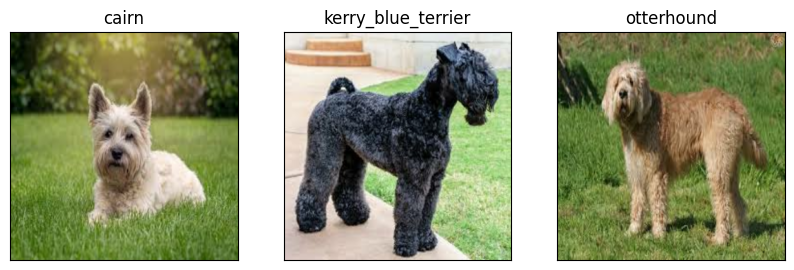

In [74]:
custom_images = [] 

for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)
plt.figure(figsize=(10,10))
for i,image in enumerate(custom_images):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_preds_labels[i])
    plt.imshow(image)


## Trying to train all Augmented images on NasNetLarge

In [37]:
full_data = create_data_batch(X,y)
# full model tensorboard 
full_data_tensorboard = create_tensorboard_callback()
# full model early_stopping 
full_data_early_stopping = tf_keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)

Creating training data batch!!


In [42]:
full_model = create_model()
full_model.summary()

Building the model https://www.kaggle.com/models/google/nasnet/TensorFlow2/large-classification/2
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1001)              88953851  
                                                                 
 dense_3 (Dense)             (None, 120)               120240    
                                                                 
Total params: 89074091 (339.79 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 88953851 (339.33 MB)
_________________________________________________________________


In [43]:
full_model.fit(
    x = full_data,
    epochs = num_epochs,
    callbacks = [full_data_tensorboard,full_data_early_stopping]
)

Epoch 1/100


I0000 00:00:1735776918.671699     642 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1735776922.572163     645 service.cc:148] XLA service 0x7ff781596ff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735776922.572439     645 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-01-01 19:15:22.703539: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1735776923.004654     645 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


570/570 [==============================] - 110s 165ms/step - loss: 2.2735 - accuracy: 0.5672 
Epoch 2/100
570/570 [==============================] - 94s 164ms/step - loss: 1.3639 - accuracy: 0.6770
Epoch 3/100
570/570 [==============================] - 93s 163ms/step - loss: 1.1068 - accuracy: 0.7203
Epoch 4/100
570/570 [==============================] - 94s 165ms/step - loss: 0.9425 - accuracy: 0.7545
Epoch 5/100
570/570 [==============================] - 94s 165ms/step - loss: 0.8214 - accuracy: 0.7837
Epoch 6/100
570/570 [==============================] - 94s 165ms/step - loss: 0.7264 - accuracy: 0.8067
Epoch 7/100
570/570 [==============================] - 94s 165ms/step - loss: 0.6439 - accuracy: 0.8276
Epoch 8/100
570/570 [==============================] - 94s 165ms/step - loss: 0.5744 - accuracy: 0.8469
Epoch 9/100
570/570 [==============================] - 93s 164ms/step - loss: 0.5176 - accuracy: 0.8626
Epoch 10/100
570/570 [==============================] - 94s 165ms/step - l

## Conclusions : 
1. Trained 10,000 Augmented-images on MobileNetV2 and got training accuracy of 99.8% and validation accuracy of 80.25%. 
2. Trained 10,000 Augmented-images on NasNetLarge and got training accuracy of 98% and validation accuracy of 93.7%.
3. Trained on 18,222 full_Augmented data on MobileNetV2 and got training accuracy of 97.3%
4. Trained on 18,222 full_Augmented data on NasNetLarge and got training accuracy of 95.4%

Augmented the image data for better generalization and from experimentation it looks like NasNetLarge is better at generalizing the prediction. 

In [53]:
nasnetlrge_full_augmented_predictions_1 = full_model.predict(custom_data,verbose=1) 

1/1 [==============================] - 2s 2s/step


In [57]:
save_model(full_model,'all-images-Augmneted-ta-NasNetLarge-Adam')

Saving model to :models/20250101-20081735780114-all-images-Augmneted-ta-NasNetLarge-Adam.h5...


'models/20250101-20081735780114-all-images-Augmneted-ta-NasNetLarge-Adam.h5'

In [58]:
def get_pred_labels(predictions):
    return unique_breeds[np.argmax(predictions)]

In [61]:
custom_preds_labels = [get_pred_labels(nasnetlrge_full_augmented_predictions_1[i])  for i in range(len(nasnetlrge_full_augmented_predictions_1)) ]
custom_preds_labels

['cairn', 'kerry_blue_terrier', 'otterhound']

2025-01-01 20:09:30.466976: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


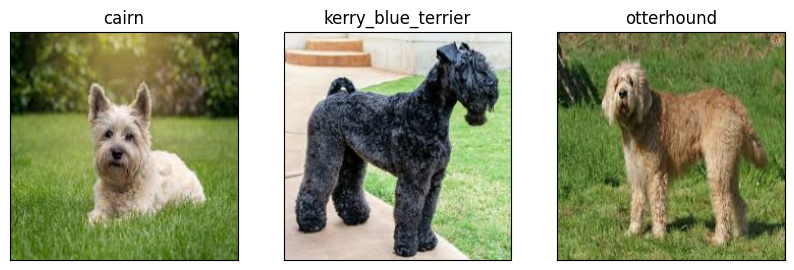

In [62]:
custom_images = [] 

for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)
plt.figure(figsize=(10,10))
for i,image in enumerate(custom_images):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_preds_labels[i])
    plt.imshow(image)


In [70]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [75]:
logs = 'logs\ '

In [76]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 5025), started 0:06:46 ago. (Use '!kill 5025' to kill it.)